#### 檔案存取open內建函式的使用
- 在讀取或寫入文件之前，必須使用 Python 內建的 open( ) 函數開啟 文件
- 這個函數將建立一個文件物件，這個文件物件會與真實的文件做連結，可讓您透過文件物件對文件進行存取動作。

```file object = open(file_name [, access_mode])```

- UTF8 編碼資料還請加入另一個參數才可避免亂碼:encoding=‘utf-8'
- file_name：參數是一個字串資料，代表包含要連結的文件名稱。
- access_mode：確定文件必須打開的模式，包括讀取、寫 入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為 讀取(r)
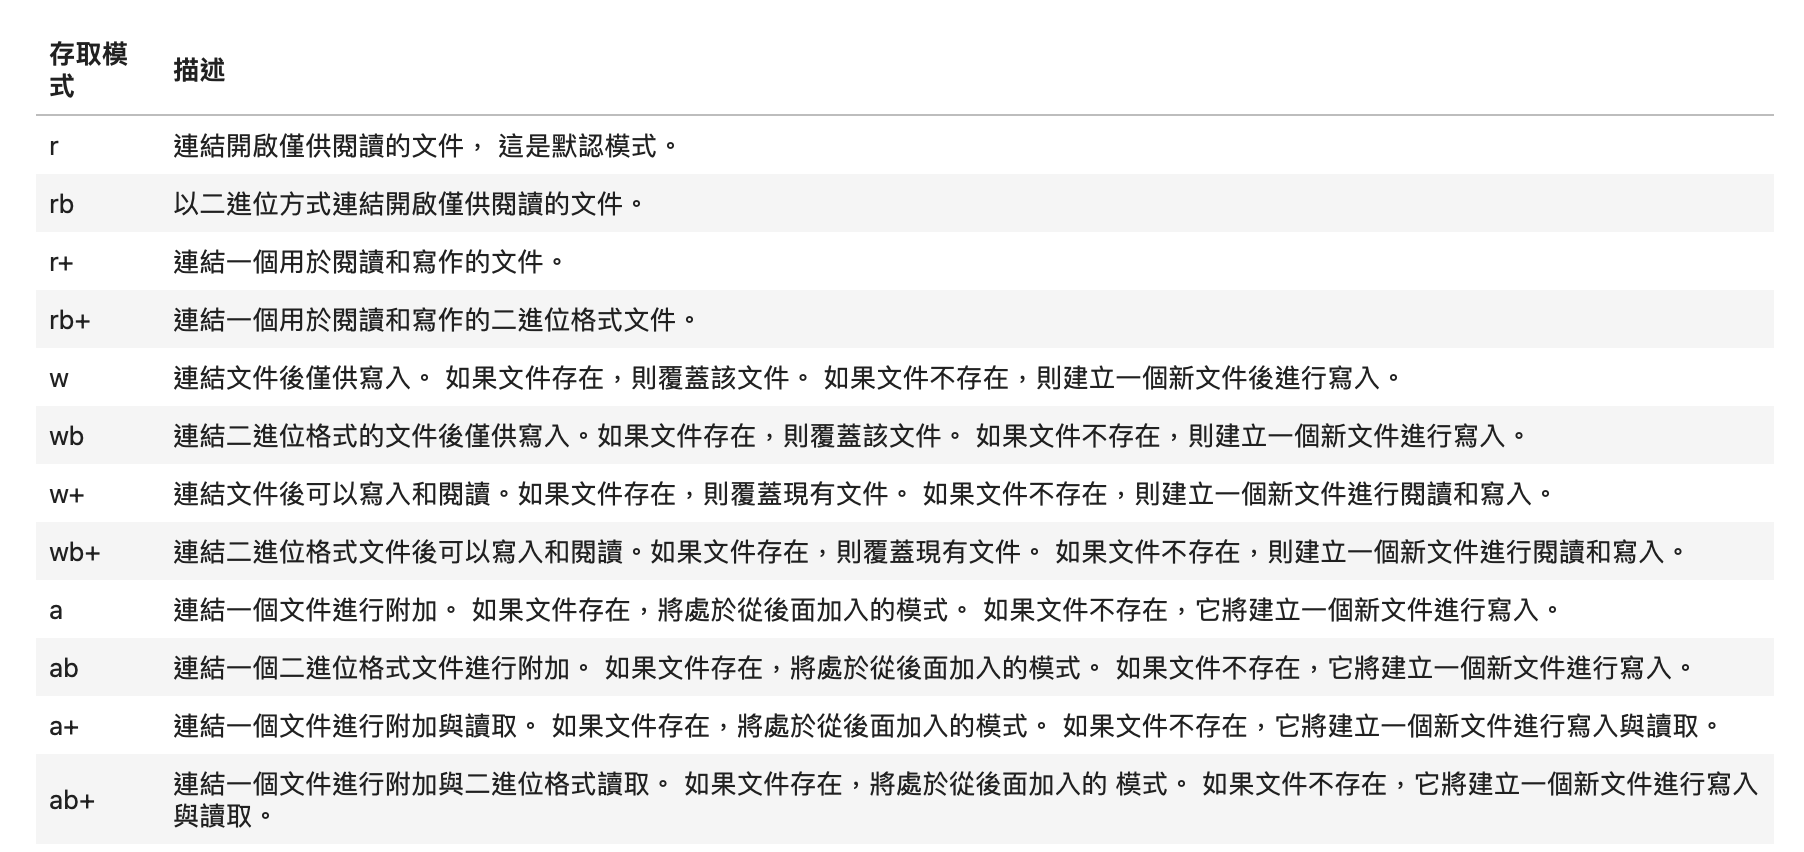

In [10]:
# 操作範例1:建立一個text的文件物件，並且寫入資料
# 使用print()＋open()寫入

text = '''python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。'''

print(text ,file=open('data.txt','w',encoding='utf-8'))
# print(text ,file=open('data.txt','w'))
# open(資料名稱,'w')－> w 代表文件連結後僅供寫入，且覆蓋該文件原本的內容，如果沒有的話就建立一個data.txt的檔案
# encoding -> 設定打開文件時的編碼格式，如果沒有設定的話預設值＝None，不同平台的預設值都不同，所以設定utf-8萬國碼才可以讀取所有文字（像windows的預設編碼就是GBK編碼>cp936）

In [11]:
# 操作範例2:透過write寫入資料
# 透過內建方法file.write寫入一個字典，並透過創立一個叫score.txt的文件儲存資料

no = 1
scores = dict()

while (True):
    score = int(input(f'請輸入第{no}位的成績:(-1為結束)')) #手動輸入每一個序列的資料
    if score == -1:
        break
    scores[no] = score #把手動輸入的每一筆資料透過編號儲存到字典
    no += 1

file=open('score.txt' , 'w', encoding='utf-8') # 開啟一個score.txt的文件並提供寫入
file.write(str(scores)) #透過 write的method把scores的資料（dict())寫入txt檔案中
file.close() # 關閉一個已打開的文件。關閉後的文件不能再進行讀寫

#### 檔案讀取 READ函式運用

```read([size]) -> method```

- read([size]) 方法從文件當前位置起讀取 size 個字元數量，若無參數，則代表讀取至文件結束為止
- 中文、英數與換行都是一格

In [18]:
# read讀取整份文件 or read(5) 讀取部分字元數

file = open('data.txt', 'r', encoding='UTF-8') #讀取剛剛建立的data.txt檔案
content = file.read() #透過read方法把僅可閱讀的資料儲存在content實體，沒有寫參數就是讀取整份文件
print(content) 
#file.close( )
print("-------------")

#再新增一個實體contect2，但只閱讀前五個字元數的資料
file = open('data.txt', 'r', encoding='UTF-8') 
content2 = file.read(5) 
print(content2)
file.close( )

python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
-------------
pytho


#### readline 跟 readlines 的使用
- readline 方法
    1. 這個方法每次讀出一行內容，所以讀取時占用緩衝區較小，比較適合大型文件讀取，讀取到沒有資料為止
    2. 若不使用 readline 可用 with 敘述一行一行讀取資料，再使用 for 迴圈 逐一進行處理
    3. len( ) 代表計算字串字數
    
- readlines 方法
    1. 這方法將讀取整個文件所有行，保存在一個 list 內

#### 讀取文件後可搭配使用的方法
``` 
    1. strip() 去除字串首尾的空白
    2. lstrip( ) 去除字串左邊的空白
    3. rstrip( ) 去除字串右邊的空白
    4. startswith(‘字元’): 第一個字元```

In [27]:
f=open('data.txt', 'r', encoding='UTF-8') #建立一個data1.txt僅可讀取的檔案
result = list( ) #建立一個result實體，並以list的形式儲存，未來儲存讀取後的結果用
for line in f.readlines( ): #for in迴圈，讀取f資料裡的每一行
    line = line.strip( )    #去除資料裡的首尾空白
    if not len(line) or line.startswith('#'): #如果資料內的字串首字不是#註解形式
        continue  #繼續讀取下一行
    result.append(line) #透過.append()方法將line的資料寫入result的最後一行
f.close() #讀取到資料最後時，自動關閉檔案的讀取寫入權限
result.sort( ) #將內容自動由小排到大
print(result)  

#建立一個新的檔案，並寫入result的資料，並透過.join函式整理內容(把內容連成一串字串)
#並在字串內部加入 %s 「可替換字串符」 % 替換為 \n 「空一行」（所以內容會自動排列好）
open('result-readlines.txt', 'w', encoding='UTF-8').write('%s' % '\n'.join(result))

#'%s' % '\n'.join(result)
#將result的內容寫入，並將空格結尾變成空一行
#但最後為什麼會有63算字數？

['1. 我們來試試看中文儲存能力。', '2. 許這個字會有編碼衝突風險。', '3. 犇這個字必須是utf8編碼才有。', 'python與中文']


63

#### str字串整理方式(split, join)
```<sep>.join(<iterable>)```

- 讓寫入的內容自動連結成一串字串
- 「iterable」是任何包含子字符串的 Python 可迭代对象，例如一个列表或一个元组
- 「sep」 是你想要它加入子字符串的分隔符，必須以str字串形式呈現
    - %s 可以替换字符串
    - %f 可以替换小数
    - %d 可以替换整数
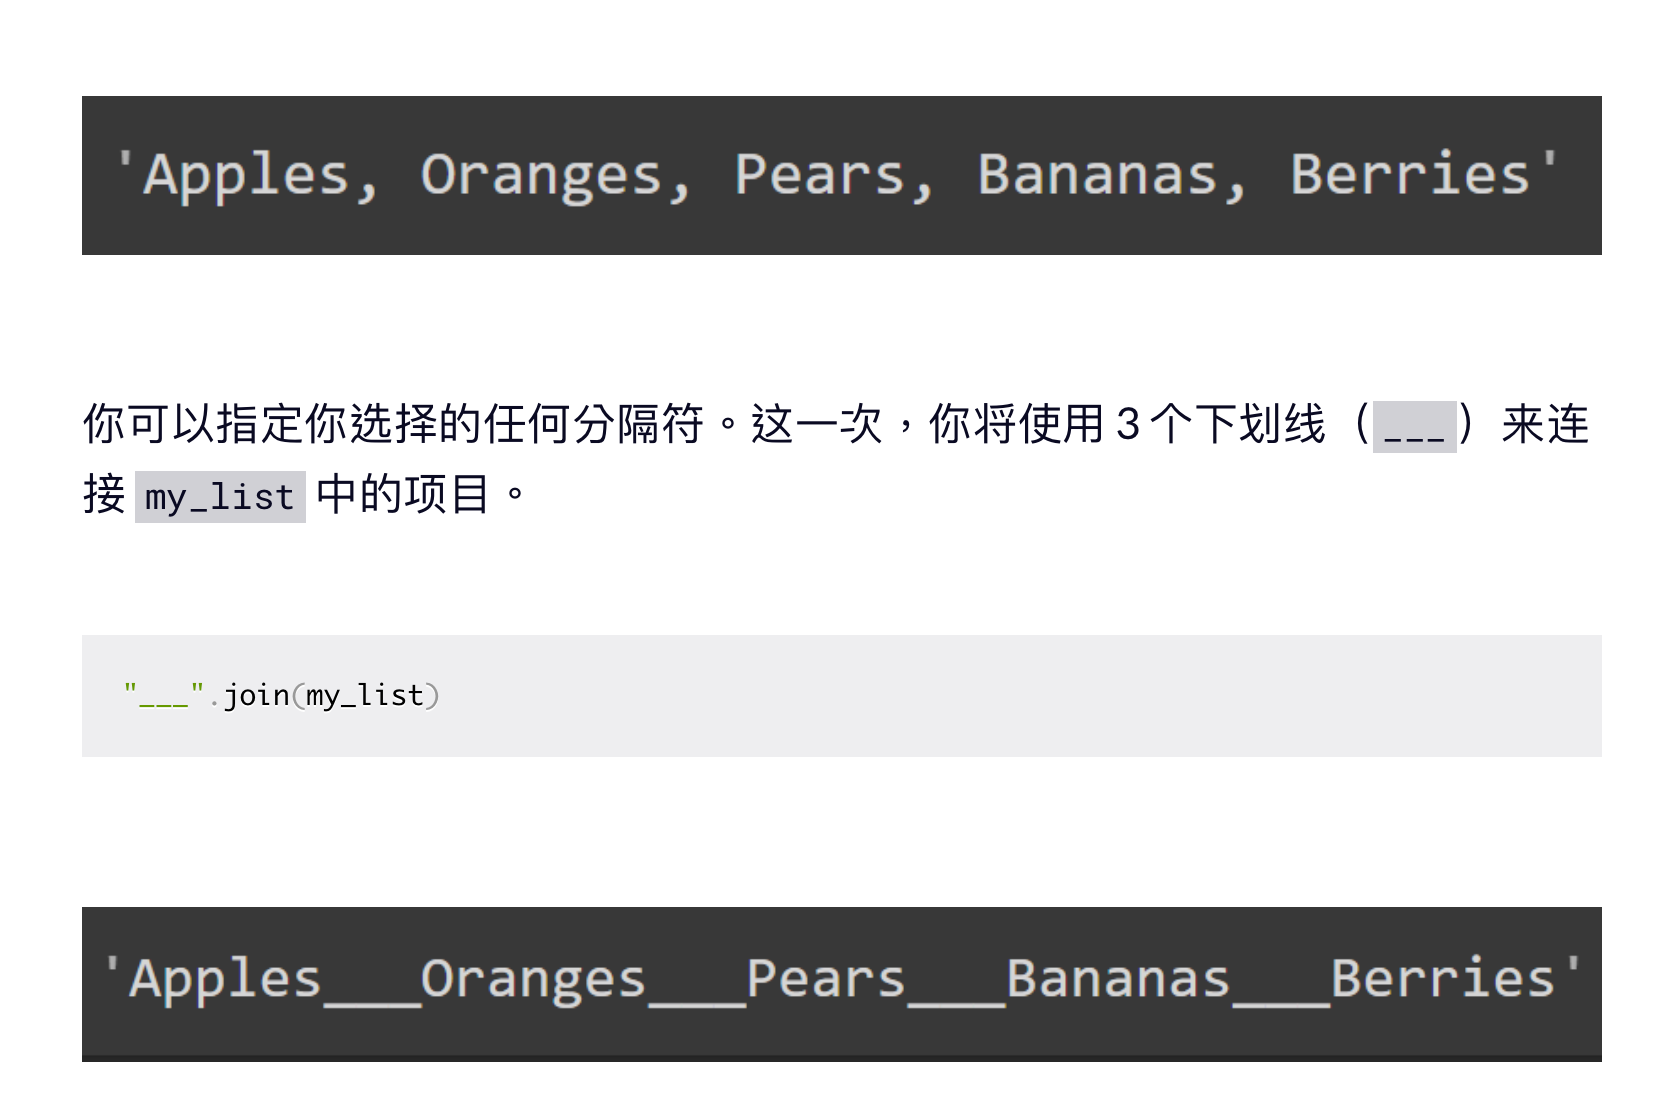

```<string>.split(sep,maxsplit)```

- 「string」 是任何的有效的 Python 字符串
- 「sep」 是你用来作为拆分基准的分隔符，應該以str字串形式呈現
- 如果你想在出现逗号时拆分你可以设置 sep = ","（如果沒設定預設為空格）
- 「maxsplit」 是一个可选参数，指示你要拆分字串的次数（預設值為-1）
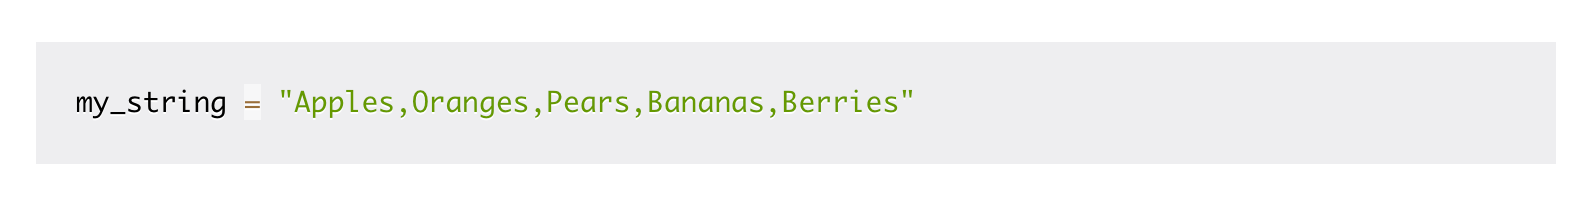
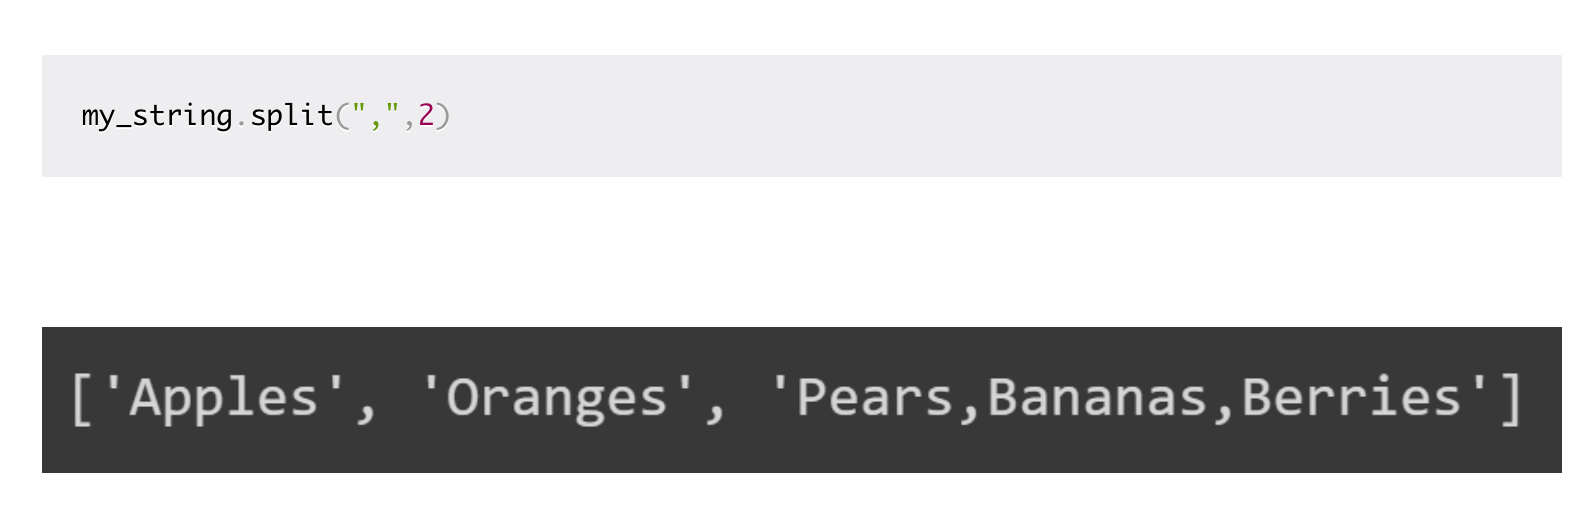

[補充資料](https://www.freecodecamp.org/chinese/news/python-string-split-and-join-methods-explained-with-examples-2/)

#### 讀取CSV檔案

- 逗點分隔（Comma-Separated Values，簡稱 csv）是一種簡單的文字檔格式，以逗號分隔不同欄位的資料，很多軟體在儲存與交換表格資料時都支援這樣的格式

- CSV 格式是資料庫最常用的導入和導出格式
- 資料均沒有類型，一切都是字串
- 沒有字體或顏色與儲存格寬度高度的設置
- Python 語法必須加入 import csv
- 讀取儲存格資料:
    1. reader( ):依照每一列的編號 由0開始
    2. DictReader( )
        - 以第一列的值為每一行的名稱，第一列不是資料
        - 也可以重新命名，但第一列必須是資料


In [61]:
# 先用requests下載老師github上的ex1.csv檔案
import requests
url = "https://raw.githubusercontent.com/roberthsu2003/python/master/檔案存取/ex1.csv"
res = requests.get(url)
if res.ok:
    print('下載成功')
else:
    print('下載失敗')

#記得下載完成之後要建立檔案並把資料寫入

#用print的寫入方法
'''print(res.text, file=open('ex1.csv', 'w'))'''

#用write的寫入方法
file = open('ex1.csv', 'w')
file.write(str(res.text))
file.close()

下載成功


In [43]:
# 操作範例 1:請動手操作，並留意輸出結果

# 我們使用 csv.reader 讀取出來的 rows 會是一個二維的 list
# 裡面就是整張表格的資料，這裡我們把每一列的 list 直接輸出，執行後會像這樣：
# 一定要用import csv讀取
# 內容可以用list的方式儲存及叫出

import csv 
f=open('ex1.csv',"r",encoding='utf-8') #讀取ex1這個檔案透過f(obj)接收資料內容
rows = csv.reader(f) #rows是一個generator #將資料存入變數rows裡

list1 = list(rows) #將rows資料用list的形式存到list1
print(list1)       #印出list
f.close()

# rows = 每一行
# generator產生器＝當需要迭代內容非常大的串列時，往往會消耗不少電腦的記憶體，這時如果改用「產生器」的方式，就能產生更好的效能
# 但generator產生器的資料只能產生一次

[['a', 'b', 'c', 'd', 'message'], ['1', '2', '3', '4', 'hello'], ['5', '6', '7', '8', 'world'], ['9', '10', '11', '12', 'foo']]


In [42]:
# 內容也可以用for in的方式叫出

import csv 
f=open('ex1.csv',"r",encoding='utf-8') #讀取ex1這個檔案透過f(obj)接收資料內容
rows = csv.reader(f) #rows是一個generator #將資料存入變數rows裡

print(type(rows)) #查詢rows資料型別，得出<class '_csv.reader'>
for row in rows: #用for in把ex1的資料都放到row裡
    print(row)

<class '_csv.reader'>
['a', 'b', 'c', 'd', 'message']
['1', '2', '3', '4', 'hello']
['5', '6', '7', '8', 'world']
['9', '10', '11', '12', 'foo']


In [69]:
#請讀入資料集內的(各鄉鎮市區人口密度.csv)
import requests
import csv

url = 'https://github.com/roberthsu2003/python/blob/master/檔案存取/各鄉鎮市區人口密度.csv'
requests.get(url)
download1 = requests.get(url)
if download1.ok:
    print('下載成功')

else:print('下載失敗')

#print(download1.text, file=open('各鄉鎮市區人口密度.csv', 'w', encoding='utf-8') )
#（但這樣寫入的資料沒有分行？應該要再設定strip()去除空白？跟'%s' % '\n'自動換行？）

file = open('各鄉鎮市區人口密度.csv', 'w', encoding='utf-8')
file.write(str(download1.text))
file.close()

下載成功


In [72]:
#將資料轉為2維的list=>[[],[],[]]
import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.reader(f) #存入rows
poplist=list(rows)
print(poplist)
f.close()

[['\ufeffstatistic_yyy', 'site_id', 'people_total', 'area', 'population_density'], ['統計年', '區域別', '年底人口數', '土地面積', '人口密度'], ['106', '新北市板橋區', '551480', '23.1373', '23835'], ['106', '新北市三重區', '387484', '16.317', '23747'], ['106', '新北市中和區', '413590', '20.144', '20532'], ['106', '新北市永和區', '222585', '5.7138', '38956'], ['106', '新北市新莊區', '416524', '19.7383', '21102'], ['106', '新北市新店區', '302089', '120.2255', '2513'], ['106', '新北市樹林區', '184149', '33.1288', '5559'], ['106', '新北市鶯歌區', '86593', '21.1248', '4099'], ['106', '新北市三峽區', '114926', '191.4508', '600'], ['106', '新北市淡水區', '169597', '70.6565', '2400'], ['106', '新北市汐止區', '199321', '71.2354', '2798'], ['106', '新北市瑞芳區', '40353', '70.7336', '570'], ['106', '新北市土城區', '238067', '29.5578', '8054'], ['106', '新北市蘆洲區', '201309', '7.4351', '27075'], ['106', '新北市五股區', '84919', '34.8632', '2436'], ['106', '新北市泰山區', '78911', '19.1603', '4118'], ['106', '新北市林口區', '106101', '54.1519', '1959'], ['106', '新北市深坑區', '23660', '20.5787', '1150'], ['106', '新北市石碇區

In [73]:
#將資料轉為2維的list=>[{},{},{}]
import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.reader(f)

for poplist in rows:
    print(poplist)

['\ufeffstatistic_yyy', 'site_id', 'people_total', 'area', 'population_density']
['統計年', '區域別', '年底人口數', '土地面積', '人口密度']
['106', '新北市板橋區', '551480', '23.1373', '23835']
['106', '新北市三重區', '387484', '16.317', '23747']
['106', '新北市中和區', '413590', '20.144', '20532']
['106', '新北市永和區', '222585', '5.7138', '38956']
['106', '新北市新莊區', '416524', '19.7383', '21102']
['106', '新北市新店區', '302089', '120.2255', '2513']
['106', '新北市樹林區', '184149', '33.1288', '5559']
['106', '新北市鶯歌區', '86593', '21.1248', '4099']
['106', '新北市三峽區', '114926', '191.4508', '600']
['106', '新北市淡水區', '169597', '70.6565', '2400']
['106', '新北市汐止區', '199321', '71.2354', '2798']
['106', '新北市瑞芳區', '40353', '70.7336', '570']
['106', '新北市土城區', '238067', '29.5578', '8054']
['106', '新北市蘆洲區', '201309', '7.4351', '27075']
['106', '新北市五股區', '84919', '34.8632', '2436']
['106', '新北市泰山區', '78911', '19.1603', '4118']
['106', '新北市林口區', '106101', '54.1519', '1959']
['106', '新北市深坑區', '23660', '20.5787', '1150']
['106', '新北市石碇區', '7683', '144.3498'

In [74]:
#將資料轉為2維的list=>[{},{},{}] 改寫為dict

import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.reader(f)
poplist=dict()

for row in rows:
    if row[0] == '106':
        row.append(rows)
        poplist += row

print(poplist)

TypeError: unsupported operand type(s) for +=: 'dict' and 'list'

In [ ]:
t
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8')
rows = csv.reader(f)
for row in rows:
    if row[0] == '106':
        poplist.append(row)
f.close()
poplist